In [1]:
import numpy as np
import pandas as pd
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
data1 = pd.read_csv('los_angeles-taz-2017-1-All-MonthlyAggregate.csv',sep=',')
data2 = pd.read_csv('los_angeles-taz-2017-2-All-MonthlyAggregate.csv',sep=',')
data3 = pd.read_csv('los_angeles-taz-2017-3-All-MonthlyAggregate.csv',sep=',')
data4 = pd.read_csv('los_angeles-taz-2017-4-All-MonthlyAggregate.csv',sep=',')
data5 = pd.read_csv('los_angeles-taz-2018-1-All-MonthlyAggregate.csv',sep=',')

In [3]:
data = pd.concat([data1,data2,data3,data4])

In [4]:
def draw_top(n,frame,type):
    x = range(n)
    plt.bar(x,frame.head(n=show),width=0.5)
    plt.xticks(x,frame.index,fontsize=8)
    plt.ylabel('Count',fontsize=12)
    
    if type==0:
        plt.xlabel('sourceid',fontsize=12)
    else:
        plt.xlabel('dstid',fontsize=12)

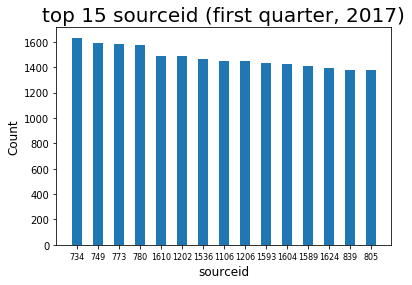

In [5]:
sid = data1.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

draw_top(show,sid,0)
plt.title('top 15 sourceid (first quarter, 2017)',fontsize=20)
plt.show()

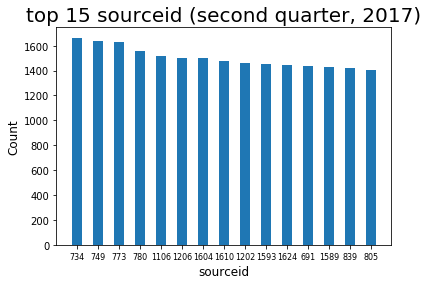

In [6]:
sid = data2.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

draw_top(show,sid,0)
plt.title('top 15 sourceid (second quarter, 2017)',fontsize=20)
plt.show()

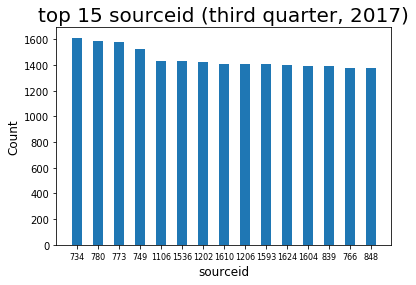

In [7]:
sid = data3.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

draw_top(show,sid,0)
plt.title('top 15 sourceid (third quarter, 2017)',fontsize=20)
plt.show()

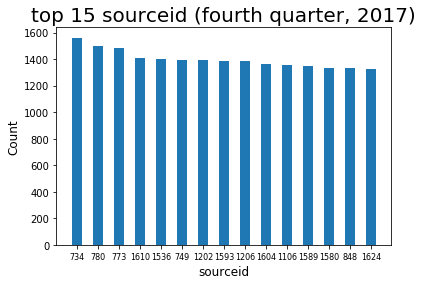

In [8]:
sid = data4.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

draw_top(show,sid,0)
plt.title('top 15 sourceid (fourth quarter, 2017)',fontsize=20)
plt.show()

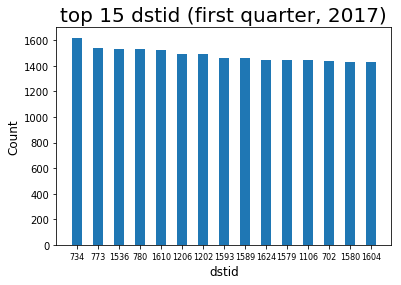

In [9]:
did = data1.groupby(by='dstid')['dstid'].count().sort_values(ascending=False)
show = 15

draw_top(show,did,1)
plt.title('top 15 dstid (first quarter, 2017)',fontsize=20)
plt.show()

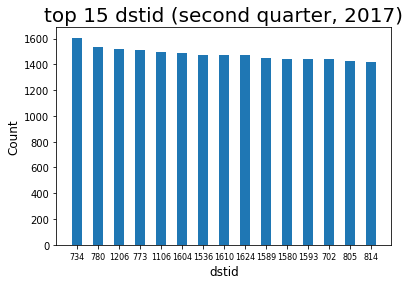

In [10]:
did = data2.groupby(by='dstid')['dstid'].count().sort_values(ascending=False)
show = 15

draw_top(show,did,1)
plt.title('top 15 dstid (second quarter, 2017)',fontsize=20)
plt.show()

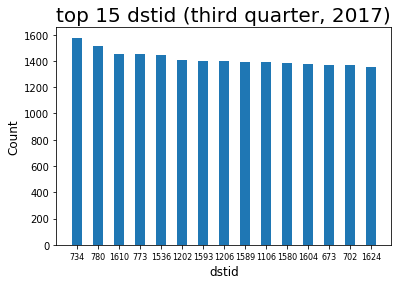

In [11]:
did = data3.groupby(by='dstid')['dstid'].count().sort_values(ascending=False)
show = 15

draw_top(show,did,1)
plt.title('top 15 dstid (third quarter, 2017)',fontsize=20)
plt.show()

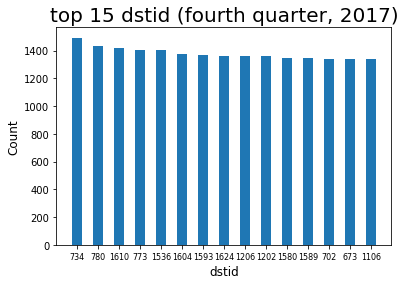

In [12]:
did = data4.groupby(by='dstid')['dstid'].count().sort_values(ascending=False)
show = 15

draw_top(show,did,1)
plt.title('top 15 dstid (fourth quarter, 2017)',fontsize=20)
plt.show()

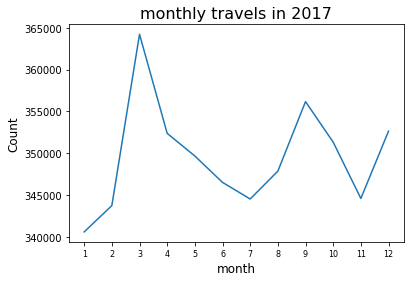

In [13]:
travels = data.groupby(by='month')['month'].count()
x = [i+1 for i in range(12)]
plt.plot(x,travels)
plt.xticks(x,x,fontsize=8)
plt.xlabel('month',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('monthly travels in 2017',fontsize=16)
plt.show()

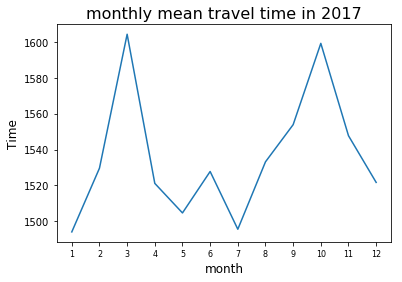

In [14]:
time = []
x = [i+1 for i in range(12)]
for i in x:
    d = data[data.month==i]
    time.append(d['mean_travel_time'].mean())    
plt.plot(x,time)
plt.xticks(x,x,fontsize=8)
plt.xlabel('month',fontsize=12)
plt.ylabel('Time',fontsize=12)
plt.title('monthly mean travel time in 2017',fontsize=16)
plt.show()

In [15]:
def plot_travel(id,type):
    if type==0:
        d = data[data.sourceid==id]
        plt.title('monthly travels from '+str(id),fontsize=16)
    else:
        d = data[data.dstid==id]
        plt.title('monthly travels to '+str(id),fontsize=16)
        
    d = d.groupby('month')['month'].count()
    x = [i+1 for i in range(12)]
    plt.plot(x,d)
    plt.xticks(x,x,fontsize=8)
    plt.xlabel('month',fontsize=12)
    plt.ylabel('Count',fontsize=12)    
    plt.show()

In [16]:
def plot_time(id,type):
    if type==0:
        d = data[data.sourceid==id]
        plt.title('monthly mean travel time from '+str(id),fontsize=16)
    else:
        d = data[data.dstid==id]
        plt.title('monthly mean travel time to '+str(id),fontsize=16)
        
    time = []
    x = [i+1 for i in range(12)]
    for i in x:
        dm = d[d.month==i]
        time.append(dm['mean_travel_time'].mean())
    plt.plot(x,time)
    plt.xticks(x,x,fontsize=8)
    plt.xlabel('month',fontsize=12)
    plt.ylabel('Time',fontsize=12)
    plt.show()

In [17]:
def plot_time_hist(id,month,type):
    d = data[data.month==month]
    if type==0:
        d = d[d.sourceid==id]
        plt.title('travel time histogram from '+str(id),fontsize=16)
    else:
        d = d[d.dstid==id]
        plt.title('travel time histogram from '+str(id),fontsize=16)
        
    min = d['mean_travel_time'].min()
    max = d['mean_travel_time'].max()
    n_bins = 20
    #plt.xlim((min-20,max+20))
    plt.xlim((0,5000))
    n,bins,patches = plt.hist(d['mean_travel_time'],n_bins,density=1,color='b',alpha=0.1)
    plt.xlabel('Time',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    
    mu = d['mean_travel_time'].mean()
    sigma = d['mean_travel_time'].std()
    y = scipy.stats.norm.pdf(bins,mu,sigma)
    plt.plot(bins,y,'r--')
        
    sns.distplot(d['mean_travel_time'],color='b',bins=n_bins)
    plt.show()

In [18]:
def plot_time_std(id,type):
    if type==0:
        d = data[data.sourceid==id]
        plt.title('monthly mean travel time deviation from '+str(id),fontsize=16)
    else:
        d = data[data.dstid==id]
        plt.title('monthly mean travel time deviation to '+str(id),fontsize=16)
        
    time = []
    x = [i+1 for i in range(12)]
    for i in x:
        dm = d[d.month==i]
        time.append(dm['mean_travel_time'].std())
    plt.plot(x,time)
    plt.xticks(x,x,fontsize=8)
    plt.xlabel('month',fontsize=12)
    plt.ylabel('Deviation',fontsize=12)
    plt.ylim((500,1000))
    plt.yticks([500,750,1000],['small','medium','large'])
    plt.grid(color='r',linestyle='-',linewidth=1,axis='y')
    plt.show()

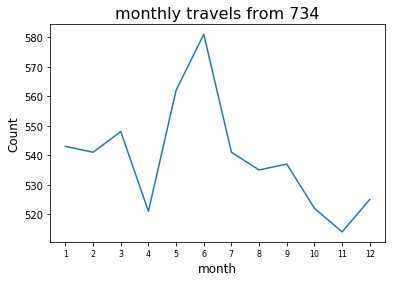

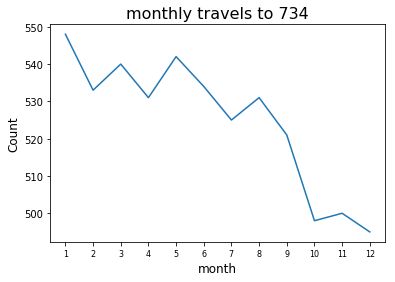

In [19]:
index = 734
plot_travel(index,0)
plot_travel(index,1)

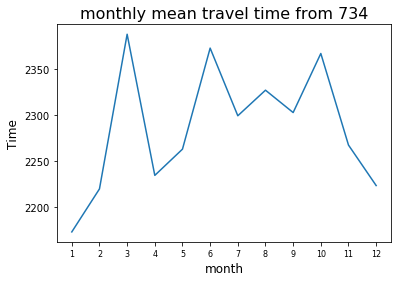

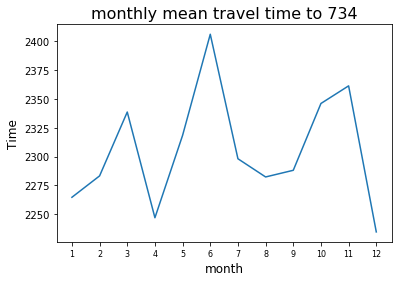

In [20]:
index = 734
plot_time(index,0)
plot_time(index,1)

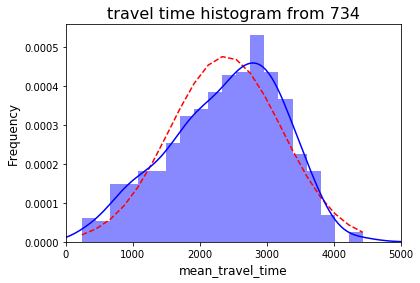

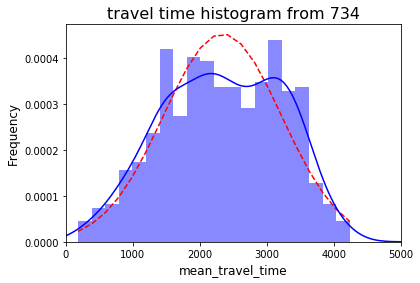

In [21]:
index = 734
plot_time_hist(index,3,0)
plot_time_hist(index,3,1)

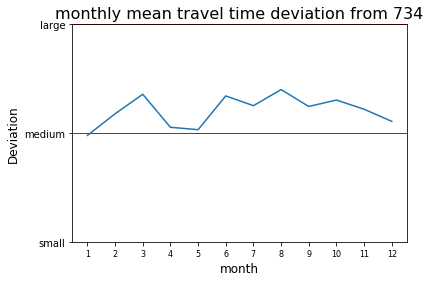

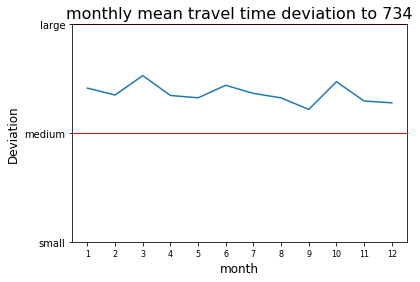

In [22]:
index = 734
plot_time_std(index,0)
plot_time_std(index,1)

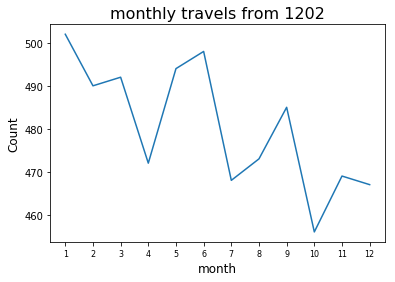

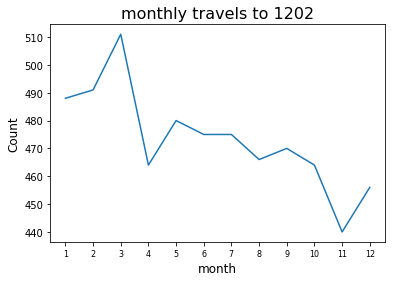

In [23]:
index = 1202
plot_travel(index,0)
plot_travel(index,1)

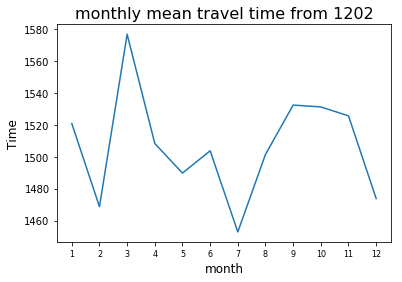

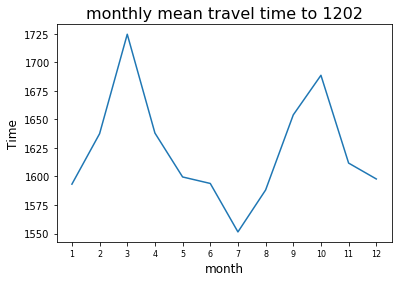

In [24]:
index = 1202
plot_time(index,0)
plot_time(index,1)

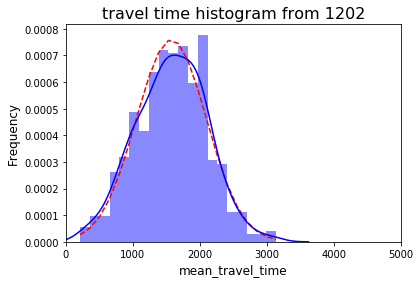

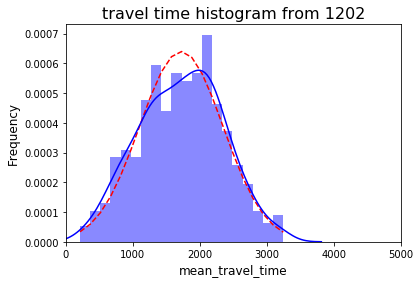

In [25]:
index = 1202
plot_time_hist(index,3,0)
plot_time_hist(index,3,1)

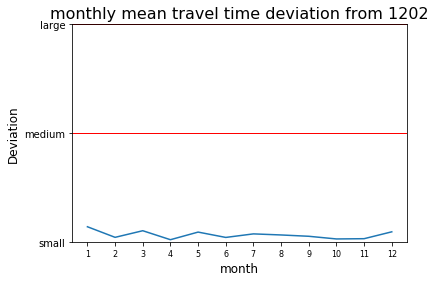

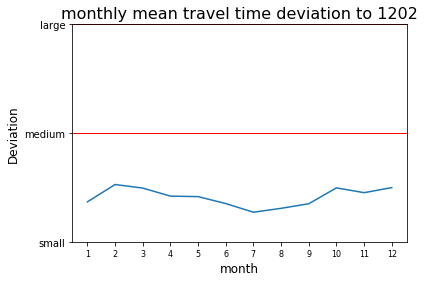

In [26]:
index = 1202
plot_time_std(index,0)
plot_time_std(index,1)

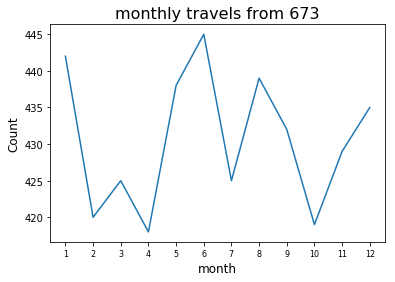

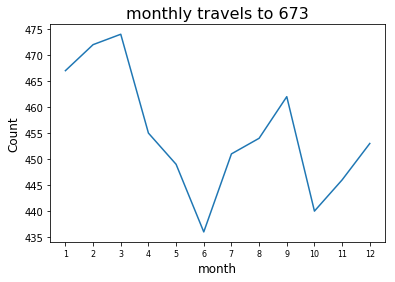

In [27]:
index = 673
plot_travel(index,0)
plot_travel(index,1)

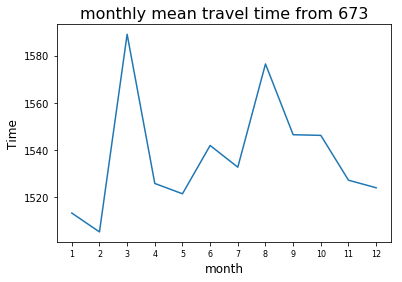

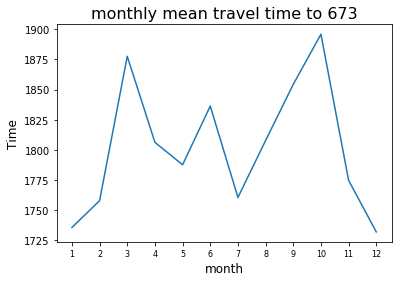

In [28]:
index = 673
plot_time(index,0)
plot_time(index,1)

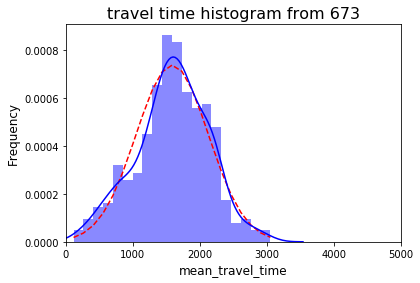

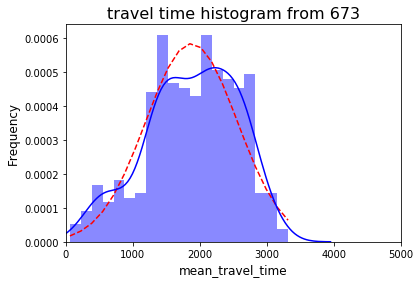

In [29]:
index = 673
plot_time_hist(index,3,0)
plot_time_hist(index,3,1)

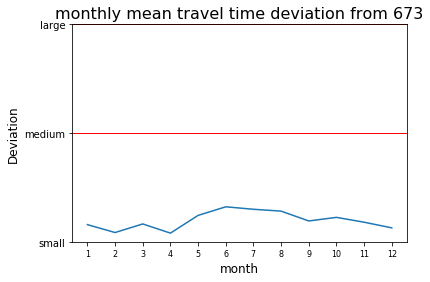

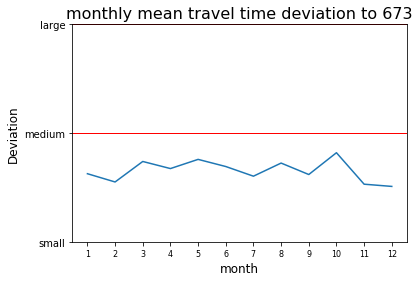

In [30]:
index = 673
plot_time_std(index,0)
plot_time_std(index,1)

In [54]:
data_d = pd.read_csv('los_angeles-taz-2018-1-WeeklyAggregate.csv',sep=',')

In [32]:
data_d

,sourceid,dstid,dow,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,332,584,6,2245.44,688.16,2136.52,1.38
1,226,1294,3,2264.85,937.16,2084.23,1.50
2,238,1174,3,2086.03,667.58,1982.83,1.38
3,228,1274,3,2156.15,946.28,1968.43,1.53
4,380,565,4,2508.17,909.27,2366.96,1.40
5,1420,1511,2,1696.03,570.12,1613.84,1.36
6,1461,1101,2,577.98,308.56,534.82,1.43
7,775,471,4,1800.74,659.90,1674.58,1.48
8,1431,1401,2,586.43,219.56,547.26,1.45
9,1421,1501,2,1108.42,412.02,1029.32,1.48


In [55]:
data_d.sort_values('standard_deviation_travel_time',ascending=False)

,sourceid,dstid,dow,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
2889417,1452,852,1,3454.17,4412.60,2106.51,2.32
3688730,1934,1791,4,3955.50,3890.41,2913.64,1.99
4374977,1931,1843,4,2887.88,3844.97,1854.49,2.15
8009895,1279,950,2,3405.22,3840.82,2099.13,2.45
6580680,980,2014,5,4063.50,3807.59,3113.85,1.87
6443856,1953,1852,4,2742.90,3732.99,1767.32,2.19
7566151,1261,950,2,3316.70,3676.08,2115.45,2.38
3401479,1936,1853,4,2813.89,3672.65,1796.22,2.23
4000497,854,1325,5,3455.86,3658.90,2476.57,2.03
5301807,980,1954,5,4230.14,3629.49,3337.52,1.84


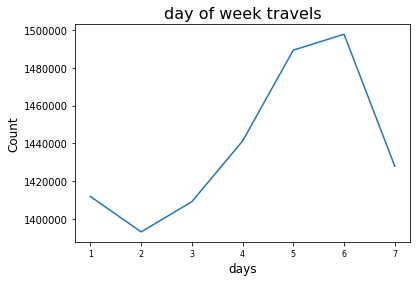

In [34]:
travels = data_d.groupby(by='dow')['dow'].count()
x = [i+1 for i in range(7)]
plt.plot(x,travels)
plt.xticks(x,x,fontsize=8)
plt.xlabel('days',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('day of week travels',fontsize=16)
plt.show()

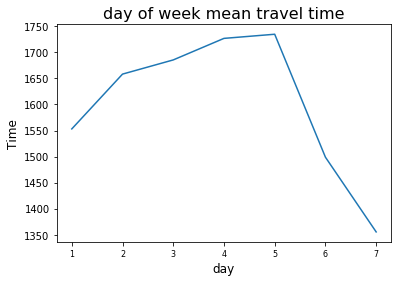

In [35]:
time = []
x = [i+1 for i in range(7)]
for i in x:
    d = data_d[data_d.dow==i]
    time.append(d['mean_travel_time'].mean())    
plt.plot(x,time)
plt.xticks(x,x,fontsize=8)
plt.xlabel('day',fontsize=12)
plt.ylabel('Time',fontsize=12)
plt.title('day of week mean travel time',fontsize=16)
plt.show()

In [36]:
def draw_top_dow(n,frame,dow,type):
    x = range(n)
    data_dow = data_d[data_d.dow==dow]
    if type==0:
        df = data_dow.groupby('sourceid')['sourceid'].count().sort_values(ascending=False)
        plt.xlabel('sourceid',fontsize=12)
        plt.title('top '+str(n)+' sourceid (day '+str(dow)+')',fontsize=20)
    else:
        df = data_dow.groupby('dstid')['dstid'].count().sort_values(ascending=False)
        plt.xlabel('dstid',fontsize=12)
        plt.title('top '+str(n)+' dstid (day '+str(dow)+')',fontsize=20)
        
    plt.bar(x,df.head(n=show),width=0.5)
    plt.xticks(x,df.index,fontsize=8)
    plt.ylabel('Count',fontsize=12)

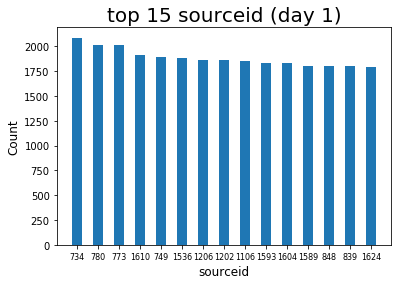

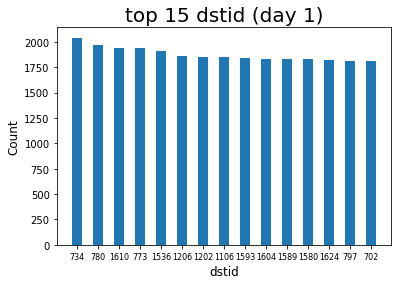

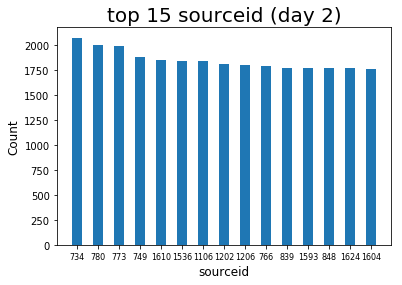

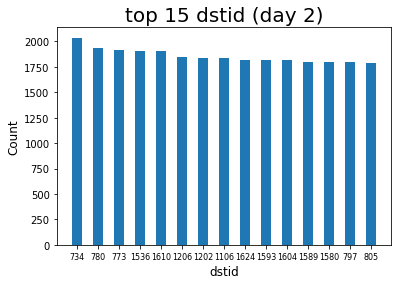

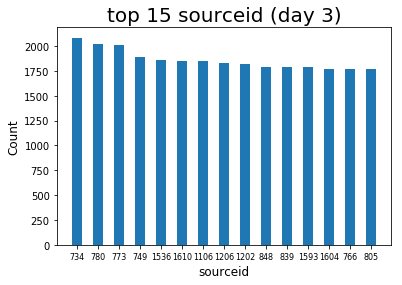

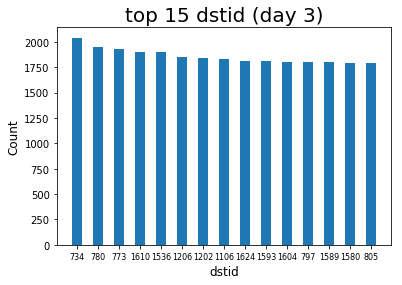

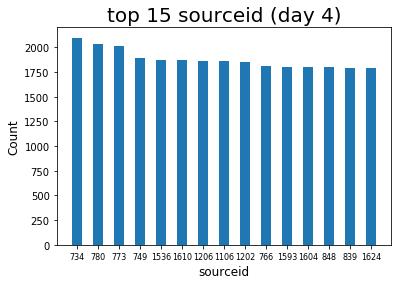

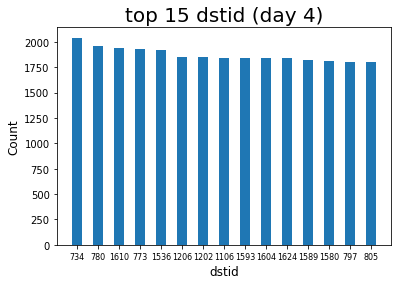

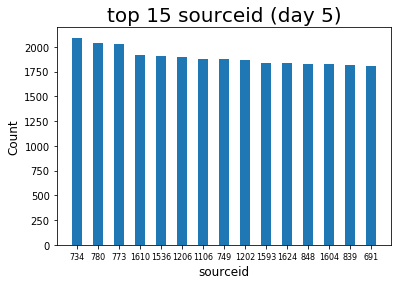

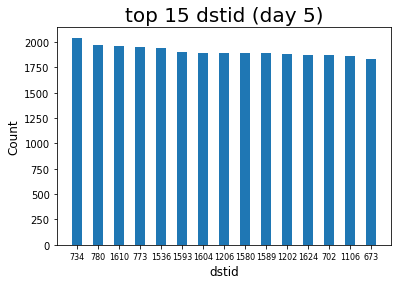

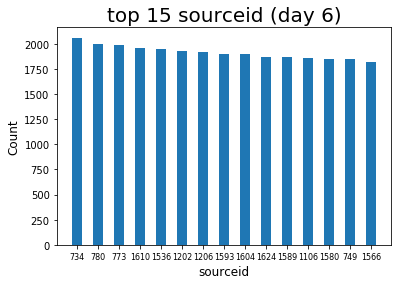

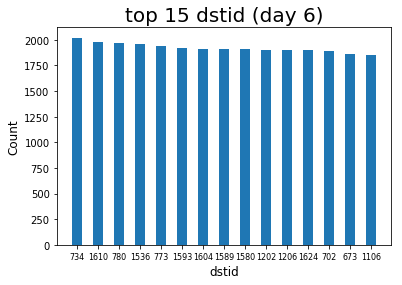

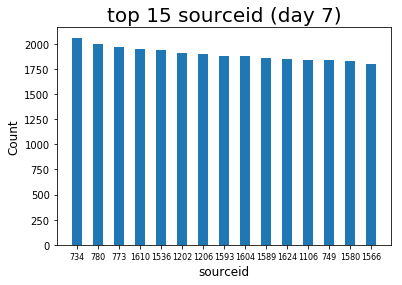

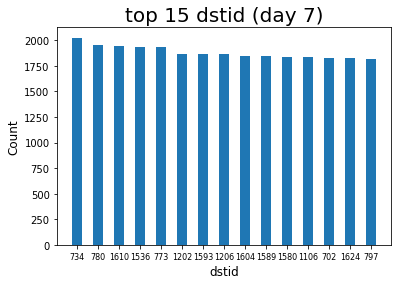

In [37]:
sid = data_d.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

for i in range(1,8):
    draw_top_dow(show,data_d,i,0)
    plt.show()
    draw_top_dow(show,data_d,i,1)
    plt.show()